# Определение перспективного тарифа для телеком-компании

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. <br>
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
# импортирование всех нужных библиотек 
import pandas as pd 
import math
import numpy as np
from scipy import stats as st

# формирование датафреймов по всем имеющимся таблицам
data_users = pd.read_csv('dataset_users.csv')
data_calls = pd.read_csv('dataset_calls.csv')
data_messages = pd.read_csv('dataset_messages.csv')
data_internet = pd.read_csv('dataset_internet.csv')
data_tariffs = pd.read_csv('dataset_tariffs.csv')

In [2]:
# просмотр общей информации о датафрейме "users"
display(data_users.head())
data_users.info()

,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   user_id     500 non-null    int64 
 2   age         500 non-null    int64 
 3   churn_date  38 non-null     object
 4   city        500 non-null    object
 5   first_name  500 non-null    object
 6   last_name   500 non-null    object
 7   reg_date    500 non-null    object
 8   tariff      500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [3]:
# просмотр общей информации о датафрейме "calls"
display(data_calls.head())
data_calls.info()

,Unnamed: 0,id,call_date,duration,user_id
0,0,1000_0,2018-07-25,0.00,1000
1,1,1000_1,2018-08-17,0.00,1000
2,2,1000_2,2018-06-11,2.85,1000
3,3,1000_3,2018-09-21,13.80,1000
4,4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  202607 non-null  int64  
 1   id          202607 non-null  object 
 2   call_date   202607 non-null  object 
 3   duration    202607 non-null  float64
 4   user_id     202607 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


In [4]:
# просмотр общей информации о датафрейме "messages"
display(data_messages.head())
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
# просмотр общей информации о датафрейме "internet"
display(data_internet.head())
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
# просмотр общей информации о датафрейме "tariffs"
display(data_tariffs.head())
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

* Тип данных:
 * Таблица "users": Изменить тип данных в столбцах 'churn_date', 'reg_date' на datetime64
 * Таблица "calls": Изменить тип данных в столбце 'call_date' на datetime64
 * Таблица "messages": Изменить тип данных в столбце 'message_date' на datetime64
 * Таблица "internet": Изменить тип данных в столбце 'session_date' на datetime64
* Лишний столбец 'Unnamed: 0' в таблице "internet"

## Подготовка данных 

### Изменение типов данных

Изменение типа данных на datetime64 в таблицах "users", "calls", "messages", "internet"

In [7]:
# просмотр имеющихся значений в столюце "churn_date"
display(data_users.query('not churn_date.isna()').head())

# изменение типа данных на datetime64
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

# проверка внесенных изменений 
display(data_users.head())
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [8]:
# изменение типа данных на datetime64
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

# проверка внесенных изменений 
display(data_calls.head())
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [9]:
# изменение типа данных на datetime64
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

# проверка внесенных изменений 
display(data_messages.head())
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [10]:
# изменение типа данных на datetime64
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

# проверка внесенных изменений 
display(data_internet.head())
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### Поиск и исправление ошибок 

Удаление лишнего столбца

In [11]:
# "отбрасывание" первого лишнего столбца
data_internet = data_internet.drop(data_internet.columns[0], axis=1) 

Проверка данных на наличие дубликатов

In [12]:
# вывод суммарного количества дубликатов в таблицах
display(data_users.duplicated().sum())
display(data_calls.duplicated().sum())
display(data_messages.duplicated().sum())
display(data_internet.duplicated().sum())

0

0

0

0

Округление вверх количества затраченных минут за сессию 

In [13]:
# применение функции округления вверх 
data_calls['duration'] = data_calls['duration'].apply(math.ceil) 

# проверка внесенных изменений 
display(data_calls.head())
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Перевод значений столбца с количеством предоставляемого трафика из мегабайт в гигабайты

In [14]:
# перевод значений столбца из мегабайт в гигабайты с изменением типа данных на Int64
data_tariffs['mb_per_month_included'] = (data_tariffs['mb_per_month_included'] / 1024).astype('Int64')

# переименование столбца 
data_tariffs.columns = ['messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name']

# проверка внесенных изменений 
display(data_tariffs.head())

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Добавление данных в имеющиеся датафреймы и формирование нового с помесячными данными

In [15]:
# добавление столбца с значением месяца
data_calls['month'] = data_calls['call_date'].dt.month 

# формирование датафрейма с помесячными данными
monthly_income = data_calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum'])
monthly_income.columns = ['count_calls', 'sum_calls_dur'] # переименование столбцов 
monthly_income = monthly_income.reset_index(level=0) # сброс индекса

# добавление столбца с значением месяца
data_messages['month'] = data_messages['message_date'].dt.month 

# добавление в датафрейм с помесячными данными количество сообщений
pivot1 = data_messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc='count')
pivot1.columns = ['count_messages'] # переименование столбцов 
pivot1 = pivot1.reset_index(level=0) # сброс индекса
monthly_income = monthly_income.merge(pivot1, on=['user_id', 'month'], how='outer')

# добавление столбца с значением месяца
data_internet['month'] = data_internet['session_date'].dt.month 

# добавление в датафрейм с помесячными данными количество затраченного трафика
pivot1 = data_internet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')
pivot1 = pivot1.reset_index(level=0) # сброс индекса
pivot1['mb_used'] = (pivot1['mb_used'] / 1024).apply(math.ceil) # применение функции округления вверх 
pivot1.columns = ['month', 'gb_used'] # переименование столбцов 
monthly_income = monthly_income.merge(pivot1, on=['user_id', 'month'], how='outer')

# сброс индекса
monthly_income = monthly_income.reset_index(level=0) 

# добавление в датафрейм столбцов "city" и 'tariff'
monthly_income = monthly_income.merge(data_users, on='user_id', how='outer')
monthly_income = monthly_income.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

# функция для расчета итоговой месячной выручки
def set_total_income(monthly_income): 
    global data_users, data_tariffs
        
    if monthly_income['tariff'] == 'smart':
        tariff_calls_included = data_tariffs['minutes_included'][0]
        tariff_messages_included = data_tariffs['messages_included'][0]
        tariff_internet_included = data_tariffs['gb_per_month_included'][0]
        rub_per_minute = data_tariffs['rub_per_minute'][0]
        rub_per_message = data_tariffs['rub_per_message'][0]
        rub_per_gb = data_tariffs['rub_per_gb'][0]
        tariff_payment = data_tariffs['rub_monthly_fee'][0]
    else:
        tariff_calls_included = data_tariffs['minutes_included'][1]
        tariff_messages_included = data_tariffs['messages_included'][1]
        tariff_internet_included = data_tariffs['gb_per_month_included'][1]
        rub_per_minute = data_tariffs['rub_per_minute'][1]
        rub_per_message = data_tariffs['rub_per_message'][1]
        rub_per_gb = data_tariffs['rub_per_gb'][1]
        tariff_payment = data_tariffs['rub_monthly_fee'][1]
        
    calls_income = max(monthly_income['sum_calls_dur'] - tariff_calls_included, 0) * rub_per_minute
    messages_income = max(monthly_income['count_messages'] - tariff_messages_included, 0) * rub_per_message    
    internet_income = max(monthly_income['gb_used'] - tariff_internet_included, 0) * rub_per_gb
        
    return (calls_income + messages_income + internet_income + tariff_payment)

# заполнение образовавшихся пропусков
monthly_income['count_calls'] = monthly_income['count_calls'].fillna(0)
monthly_income['sum_calls_dur'] = monthly_income['sum_calls_dur'].fillna(0)
monthly_income['count_messages'] = monthly_income['count_messages'].fillna(0)
monthly_income['gb_used'] = monthly_income['gb_used'].fillna(0)

# применение написанной функции к датафрейму 
monthly_income['total_income'] = monthly_income.apply(set_total_income, axis=1)

# проверка результатов 
display(data_users[data_users['user_id'] == 1128])
display(data_users[data_users['user_id'] == 1371])
display(monthly_income.info())
display(monthly_income)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   count_calls     3216 non-null   float64
 3   sum_calls_dur   3216 non-null   float64
 4   count_messages  3216 non-null   float64
 5   gb_used         3216 non-null   float64
 6   city            3216 non-null   object 
 7   tariff          3216 non-null   object 
 8   total_income    3216 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 251.2+ KB


None

,user_id,month,count_calls,sum_calls_dur,count_messages,gb_used,city,tariff,total_income
0,1005,1.0,15.0,95.0,7.0,3.0,Набережные Челны,smart,550.0
1,1005,2.0,69.0,456.0,38.0,8.0,Набережные Челны,smart,550.0
2,1005,3.0,77.0,606.0,56.0,11.0,Набережные Челны,smart,886.0
3,1005,4.0,101.0,712.0,41.0,10.0,Набережные Челны,smart,1186.0
4,1005,5.0,73.0,595.0,42.0,8.0,Набережные Челны,smart,835.0
...,...,...,...,...,...,...,...,...,...
3211,1328,10.0,0.0,0.0,6.0,22.0,Мурманск,ultra,1950.0
3212,1328,11.0,0.0,0.0,8.0,35.0,Мурманск,ultra,2700.0
3213,1328,12.0,0.0,0.0,7.0,39.0,Мурманск,ultra,3300.0
3214,1128,NaN,0.0,0.0,0.0,0.0,Волжский,ultra,1950.0


## Анализ данных 

### Тариф 'smart'

* Распределение суммарного количество минут разговора соответствует биноминальному распределению скошенному вправо, значения превышающие 982 минуты в месяц можно считать выбросами, учитывая правило трех сигм.
* Распределение количества сообщений пользователей соответствует геометрическому распределению, выбросы - значения превышающие 116 сообщений.
* Распределение использованного трафика соответствует биноминальному распределению, выбросы - значения меньше 1 гигабайта и больше 30.

### Тариф 'ultra'

* Распределение суммарного количество минут разговора соответствует биноминальному распределению скошенному вправо, значения превышающие 1490 минут в месяц - выбросы.
* Распределение количества сообщений пользователей соответствует геометрическому распределению, выбросы - значения превышающие 193 сообщения.
* Распределение использованного трафика соответствует биноминальному распределению, выбросы - значения больше 46 гигабайт.

### Вывод

* Около половины клиенты с тарифом 'smart' превышают бесплатный лимит в количестве минут и интернет трафике. 
* Клиенты тарифа 'ultra', напротив, даже близко не приближаются к 'бесплатному порогу' в количестве минут и сообщений, что нельзя сказать о затраченном трафике, небольшое количество клиентов превышает лимит. 
* Замечено аномально большое количество нулевых значений в сумме отправленных сообщений у клиентов обоих тарифов, можно предположить, что для отправки сообщений клиенты пользуются мессенджерами, которым требуется исключительно интернет.
* В среднем клиенты тарифа "smart" платят в два раза больше установленной тарифной платы.

In [16]:
# формирование выборки по тарифу "smart"
data_tariff_smart = monthly_income.query('tariff == "smart"')

# формирование выборки по тарифу "ultra"
data_tariff_ultra = monthly_income.query('tariff == "ultra"')

# таблицы со статистическими метриками
display(monthly_income.pivot_table(index='tariff', 
                                   values=['sum_calls_dur', 'count_messages', 'gb_used'], 
                                   aggfunc=['mean', 'var', 'std']))
display(monthly_income.pivot_table(index='tariff', values='total_income', aggfunc=['mean', 'sum']))

mean                                     var             \
       count_messages    gb_used sum_calls_dur count_messages    gb_used   
tariff                                                                     
smart       33.369058  16.321525    417.747534     796.955256  33.133453   
ultra       49.313387  19.474645    526.089249    2285.417425  97.378544   

                                 std                          
        sum_calls_dur count_messages   gb_used sum_calls_dur  
tariff                                                        
smart    36281.393836      28.230396  5.756167    190.476754  
ultra   101052.493549      47.806040  9.868057    317.887549

,mean,sum
,total_income,total_income
tariff,,
smart,1289.641704,2875901.0
ultra,2070.030426,2041050.0


<AxesSubplot:title={'center':'sum_calls_dur'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'count_messages'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'gb_used'}, ylabel='Frequency'>

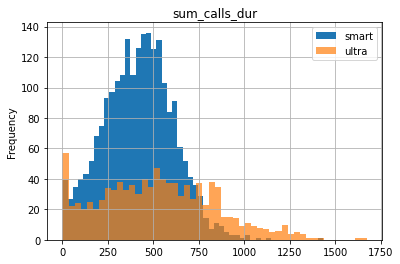

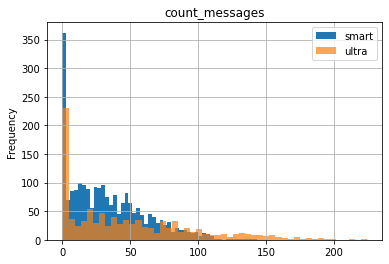

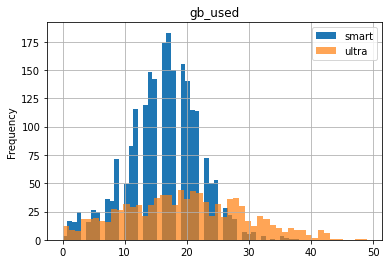

In [17]:
# гистограммы для суммарного количества потраченных минут, сообщений, трафика по тарифу "ultra"
ax = data_tariff_smart.plot(y='sum_calls_dur', kind='hist', bins=50, grid=True, label='smart')
display(data_tariff_ultra.plot(y='sum_calls_dur', kind='hist', bins=50, grid=True, ax=ax, label='ultra', 
                               title='sum_calls_dur', alpha=0.7))

ax = data_tariff_smart.plot(y='count_messages', kind='hist', bins=50, grid=True, label='smart')
display(data_tariff_ultra.plot(y='count_messages', kind='hist', bins=50, grid=True, ax=ax, label='ultra', 
                               title='count_messages', alpha=0.7))

ax = data_tariff_smart.plot(y='gb_used', kind='hist', bins=50, grid=True, label='smart')
display(data_tariff_ultra.plot(y='gb_used', kind='hist', bins=50, grid=True, ax=ax, label='ultra', 
                               title='gb_used', alpha=0.7))

## Постановка и проверка гипотез

### Первая гипотеза. Различная средняя выручка пользователей разных тарифов 

Из гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" можно сформировать двухстороннюю гипотезу, где: <br>
* **H0: Средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифов «Смарт».**
* **H1: Средняя выручка пользователей тарифов «Ультра» не равна средней выручке пользователей тарифов «Смарт».**

Дисперсии и размеры выборок различны, следовательно параметр 'equal_var' будет иметь значение 'False' при вызове нужного метода.

In [18]:
# размеры выборок
display(len(data_tariff_smart['total_income']))
display(len(data_tariff_ultra['total_income']))

# дисперсии выборок 
display(np.var(data_tariff_smart['total_income']))
display(np.var(data_tariff_ultra['total_income']))

2230

986

669430.436197993

141244.31956107615

Вероятность получить одинаковые или близкие значения очень мала, как следствие, **отвергаем нулевую гипотезу в пользу альтернативной**.

In [19]:
# установка порогового значения
alpha = .01 

# применение теста для проверки равентсва двух генеральных совокупностей
results = st.ttest_ind(data_tariff_smart['total_income'], 
                       data_tariff_ultra['total_income'],  
                       equal_var=False)

# вывод получившегося p-значения
display('p-value:', results.pvalue) 

# проверка меньше ли p-значение чем пороговое значение
if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value:'

1.9270113944198435e-250

'Отвергаем нулевую гипотезу'

### Вторая гипотеза. Различная выручка пользователей из Москвы и других регионов

Из гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" можно сформировать двухстороннюю гипотезу, где: <br>
* **H0: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.**
* **H1: Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.**

Дисперсии и размеры выборок аналогично различны.

In [20]:
# формирование выборок по городу
data_users_mcs = monthly_income.query('city == "Москва"')
data_users_other = monthly_income.query('city != "Москва"')

# размеры выборок
display(len(data_users_mcs['total_income']))
display(len(data_users_other['total_income']))

# дисперсии выборок 
display(np.var(data_users_mcs['total_income']))
display(np.var(data_users_other['total_income']))

611

2605

564710.7117467273

653818.4925923498

Отвергнуть нулевую гипотезу не получилось, в силу большой вероятности (11%) получения одинаковых или близких результатов, **данные не противоречат нулевой гипотезе.**

In [21]:
# установка порогового значения
alpha = .01 

# применение теста для проверки равентсва двух генеральных совокупностей
results = st.ttest_ind(data_users_mcs['total_income'], 
                       data_users_other['total_income'],
                       equal_var=False)

# вывод получившегося p-значения
display('p-value:', results.pvalue) 

# проверка меньше ли p-значение чем пороговое значение
if results.pvalue < alpha: 
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value:'

0.5216952110000278

'Не получилось отвергнуть нулевую гипотезу'

**Нулевые гипотезы были сформированы в силу поставленной задачи, а именно "чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег".**

Основываясь на проведенных тестах, мы выяснили, что 
* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, так как вероятность получить одинаковые или близкие значения очень мала. В частности средняя выручка пользователей тарифа "ultra" выше, чем выручка пользователей тарифа "smart"
* Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как вероятность получения одинаковых или близких результатов достаточно высокая (11%) 

## Общий вывод

* Посмотрели данные, устранили ошибки в данных, привели данные к нужному виду, сформировали новый датафрейм с помесячными метриками, сравнили данные клиентов с разными тарифами, поставили две гипотезы и проверили их.
* Большое количество клиентов тарифа "smart" превышает бесплатные лимиты, в отличие от клиентов с тарифом "ultra", у которых превышения лимитов почти нет. От чего средняя выручка клиентов 'smart' больше в два раза платы за тариф (1290). 
* После проверки гипотез выяснилось, что средняя выручка пользователей разных тарифов различается и, что выручка пользователей из Москвы и выручка пользователей других регионов не отличаются. Совокупный доход от клиентов с тарифом 'smart' выше, в силу большого превышения тарифного плана.
* Для повышения прибыли можно повысить стоимость услуг сверх тарифного плана для тарифа "smart", а именно количество трафика и минут, так же можно "урезать" количество минут у тарифа "smart".